In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
train = pd.read_csv('../datasets/train.csv')
test = pd.read_csv('../datasets/test.csv') 

In [3]:
train["Have Pool"] = train["Pool Area"].map(lambda x: 0 if x==0 else 1)
train_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool', 'Neighborhood', 'Utilities', 'Bldg Type', 'Exter Qual', 
                   'Heating', 'Central Air', 'Kitchen Qual', 'Functional', 'Garage Qual', 'SalePrice']
train = train[train_features]

In [4]:
train = pd.get_dummies(train, columns =['Neighborhood', 'Utilities', 'Bldg Type', 'Exter Qual', 
                   'Heating', 'Central Air', 'Kitchen Qual', 'Functional', 'Garage Qual'], drop_first=True)
train.head()

,Overall Qual,Gr Liv Area,Garage Area,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,Lot Frontage,Mas Vnr Area,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Qual_Fa,Garage Qual_Gd,Garage Qual_Po,Garage Qual_TA
0,6,1479,475.0,725.0,725,1976,2005,2,NaN,289.0,...,0,0,0,0,0,1,0,0,0,1
1,7,2122,559.0,913.0,913,1996,1997,2,43.0,132.0,...,0,0,0,0,0,1,0,0,0,1
2,5,1057,246.0,1057.0,1057,1953,2007,1,68.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3,5,1444,400.0,384.0,744,2006,2007,2,73.0,0.0,...,0,0,0,0,0,1,0,0,0,1
4,6,1445,484.0,676.0,831,1900,1993,2,82.0,0.0,...,0,0,0,0,0,1,0,0,0,1


In [5]:
X = train.drop('SalePrice', axis =1)
X = X.fillna(X.mean()) #imputing mean
y=np.log(train['SalePrice'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [7]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [8]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [9]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=3)
ridge_scores.mean()

0.8246902642218471

In [10]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [11]:
ridge.score(X_train, y_train)


0.8818971034515686

In [12]:
ridge.score(X_test, y_test)


0.8579883045807183

In [13]:
ridge_scores.mean()


0.8246902642218471

In [14]:
pred = ridge.predict(X_test)


In [15]:
r2_score(y_test, pred)


0.8579883045807182

In [16]:
residuals = y_test - pred


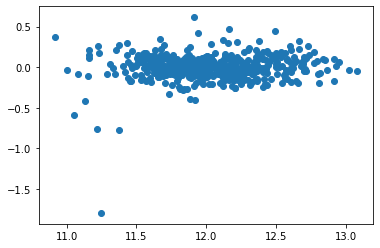

In [17]:
plt.scatter(pred, residuals)


In [18]:
#to output to csv
test["Have Pool"] = test["Pool Area"].map(lambda x: 0 if x==0 else 1)
test_features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Total Bsmt SF', '1st Flr SF',
                'Year Built', 'Year Remod/Add', 'Full Bath', 'Lot Frontage', 'Mas Vnr Area', 
                 'TotRms AbvGrd','Have Pool', 'Neighborhood', 'Utilities', 'Bldg Type', 'Exter Qual', 
                   'Heating', 'Central Air', 'Kitchen Qual', 'Functional', 'Garage Qual']
test = test[test_features]

In [19]:
test = pd.get_dummies(test, columns =['Neighborhood', 'Utilities', 'Bldg Type', 'Exter Qual', 
                   'Heating', 'Central Air', 'Kitchen Qual', 'Functional', 'Garage Qual'], drop_first=True)
test = test.fillna(test.mean()) #imputing mean


In [20]:
ss = StandardScaler()
ss.fit(test)
test = ss.transform(test)
test = ss.transform(test)

In [21]:
ridge.predict(test)

ValueError: shapes (878,61) and (67,) not aligned: 61 (dim 1) != 67 (dim 0)